In [28]:
!pip3 install --upgrade tensorflow
!pip3 install --upgrade keras

The batch file cannot be found.


  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/ca/48/643d21747d52fa380f572f76c493779fc5b4bd03605247209d2dd0a6d9a9/keras-3.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/101.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/101.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/101.3 kB ? eta -:--:--
     ---------------------- -------------- 61.4/101.3 kB 544.7 kB/s eta 0:00:01
     ----------------------------- ------- 81.9/101.3 kB 573.4 kB/s eta 0:00:01
     ------------------------------------ 101.3/101.3 kB 529.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.0 MB ? eta -:--:--
   - -------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

In [47]:
import pandas as pd

# Assuming you have a CSV file named 'example.csv' in the current directory
data_set = 'leap_motion_data.csv'
df = pd.read_csv(data_set)
df

,Palm_X,Palm_Y,Palm_Z,Thumb_Type,Thumb_X,Thumb_Y,Thumb_Z,Thumb_Extended,Index_Type,Index_X,...,Ring_Y,Ring_Z,Ring_Extended,Pinky_Type,Pinky_X,Pinky_Y,Pinky_Z,Pinky_Extended,Gesture,Sample_Number
0,15.434665,92.876419,77.490860,0,-42.896259,61.907936,21.812254,True,1,7.650800,...,64.037155,62.427979,False,4,42.160313,75.553925,67.686470,False,no,1
1,15.563915,93.305450,77.110466,0,-42.452198,61.553757,21.090757,True,1,8.273892,...,64.406998,62.250671,False,4,42.330254,75.877663,67.428719,False,no,2
2,16.683895,94.342499,74.337440,0,-40.847202,60.971256,18.089064,True,1,10.235566,...,65.192352,60.028957,False,4,43.519016,76.705727,64.914124,False,no,3
3,17.361374,95.318298,71.759644,0,-40.230534,61.150551,15.533992,True,1,11.845069,...,65.727791,57.917328,False,4,44.065121,77.276512,62.532967,False,no,4
4,18.304741,97.217682,68.487633,0,-39.364750,61.240761,12.661871,True,1,13.934396,...,66.953346,55.465069,False,4,44.801449,78.524841,59.749352,False,no,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,29.661304,170.194916,8.036845,0,8.355263,142.235458,-16.759335,False,1,-6.906921,...,154.004303,-35.848568,False,4,5.658145,147.238342,-27.149773,False,milk,56
12596,29.550388,170.233170,8.117558,0,8.176208,142.274597,-16.657528,False,1,-7.015064,...,154.173569,-35.766785,False,4,5.497898,147.381607,-27.068205,False,milk,57
12597,29.335623,170.307373,8.274667,0,7.894176,142.341187,-16.446327,False,1,-7.276845,...,154.365311,-35.578121,False,4,5.211165,147.560898,-26.874025,False,milk,58
12598,29.097370,170.360855,8.476708,0,7.557537,142.382446,-16.129372,False,1,-7.548014,...,154.540390,-35.357578,False,4,4.907746,147.714249,-26.650570,False,milk,59


In [48]:
df['Gesture'].unique()

array(['no', 'thanks', 'hello', 'boy', 'wrong', 'cat', 'milk'],
      dtype=object)

In [49]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
le = LabelEncoder()
ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()

In [50]:
columns_to_transform = ['Ring_Extended', 'Thumb_Extended', 'Index_Extended', 'Pinky_Extended', 'Middle_Extended']
x0 = le.fit_transform(df[columns_to_transform[0]])
x1 = le.fit_transform(df[columns_to_transform[1]])
x2 = le.fit_transform(df[columns_to_transform[2]])
x3 = le.fit_transform(df[columns_to_transform[3]])
x4 = le.fit_transform(df[columns_to_transform[4]])

In [51]:
df['Ring_Extended']= x0
df['Thumb_Extended']= x1
df['Index_Extended']= x2
df['Pinky_Extended']= x3
df['Middle_Extended']= x4
df

,Palm_X,Palm_Y,Palm_Z,Thumb_Type,Thumb_X,Thumb_Y,Thumb_Z,Thumb_Extended,Index_Type,Index_X,...,Ring_Y,Ring_Z,Ring_Extended,Pinky_Type,Pinky_X,Pinky_Y,Pinky_Z,Pinky_Extended,Gesture,Sample_Number
0,15.434665,92.876419,77.490860,0,-42.896259,61.907936,21.812254,1,1,7.650800,...,64.037155,62.427979,0,4,42.160313,75.553925,67.686470,0,no,1
1,15.563915,93.305450,77.110466,0,-42.452198,61.553757,21.090757,1,1,8.273892,...,64.406998,62.250671,0,4,42.330254,75.877663,67.428719,0,no,2
2,16.683895,94.342499,74.337440,0,-40.847202,60.971256,18.089064,1,1,10.235566,...,65.192352,60.028957,0,4,43.519016,76.705727,64.914124,0,no,3
3,17.361374,95.318298,71.759644,0,-40.230534,61.150551,15.533992,1,1,11.845069,...,65.727791,57.917328,0,4,44.065121,77.276512,62.532967,0,no,4
4,18.304741,97.217682,68.487633,0,-39.364750,61.240761,12.661871,1,1,13.934396,...,66.953346,55.465069,0,4,44.801449,78.524841,59.749352,0,no,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,29.661304,170.194916,8.036845,0,8.355263,142.235458,-16.759335,0,1,-6.906921,...,154.004303,-35.848568,0,4,5.658145,147.238342,-27.149773,0,milk,56
12596,29.550388,170.233170,8.117558,0,8.176208,142.274597,-16.657528,0,1,-7.015064,...,154.173569,-35.766785,0,4,5.497898,147.381607,-27.068205,0,milk,57
12597,29.335623,170.307373,8.274667,0,7.894176,142.341187,-16.446327,0,1,-7.276845,...,154.365311,-35.578121,0,4,5.211165,147.560898,-26.874025,0,milk,58
12598,29.097370,170.360855,8.476708,0,7.557537,142.382446,-16.129372,0,1,-7.548014,...,154.540390,-35.357578,0,4,4.907746,147.714249,-26.650570,0,milk,59


In [52]:
y= le.fit_transform(df['Gesture'])
y

array([4, 4, 4, ..., 3, 3, 3])

In [53]:
df['Gesture']=y
df

,Palm_X,Palm_Y,Palm_Z,Thumb_Type,Thumb_X,Thumb_Y,Thumb_Z,Thumb_Extended,Index_Type,Index_X,...,Ring_Y,Ring_Z,Ring_Extended,Pinky_Type,Pinky_X,Pinky_Y,Pinky_Z,Pinky_Extended,Gesture,Sample_Number
0,15.434665,92.876419,77.490860,0,-42.896259,61.907936,21.812254,1,1,7.650800,...,64.037155,62.427979,0,4,42.160313,75.553925,67.686470,0,4,1
1,15.563915,93.305450,77.110466,0,-42.452198,61.553757,21.090757,1,1,8.273892,...,64.406998,62.250671,0,4,42.330254,75.877663,67.428719,0,4,2
2,16.683895,94.342499,74.337440,0,-40.847202,60.971256,18.089064,1,1,10.235566,...,65.192352,60.028957,0,4,43.519016,76.705727,64.914124,0,4,3
3,17.361374,95.318298,71.759644,0,-40.230534,61.150551,15.533992,1,1,11.845069,...,65.727791,57.917328,0,4,44.065121,77.276512,62.532967,0,4,4
4,18.304741,97.217682,68.487633,0,-39.364750,61.240761,12.661871,1,1,13.934396,...,66.953346,55.465069,0,4,44.801449,78.524841,59.749352,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,29.661304,170.194916,8.036845,0,8.355263,142.235458,-16.759335,0,1,-6.906921,...,154.004303,-35.848568,0,4,5.658145,147.238342,-27.149773,0,3,56
12596,29.550388,170.233170,8.117558,0,8.176208,142.274597,-16.657528,0,1,-7.015064,...,154.173569,-35.766785,0,4,5.497898,147.381607,-27.068205,0,3,57
12597,29.335623,170.307373,8.274667,0,7.894176,142.341187,-16.446327,0,1,-7.276845,...,154.365311,-35.578121,0,4,5.211165,147.560898,-26.874025,0,3,58
12598,29.097370,170.360855,8.476708,0,7.557537,142.382446,-16.129372,0,1,-7.548014,...,154.540390,-35.357578,0,4,4.907746,147.714249,-26.650570,0,3,59


In [54]:
unique_categories = df['Gesture'].unique()
unique_categories

array([4, 5, 2, 0, 6, 1, 3])

In [55]:
df.columns

Index(['Palm_X', 'Palm_Y', 'Palm_Z', 'Thumb_Type', 'Thumb_X', 'Thumb_Y',
       'Thumb_Z', 'Thumb_Extended', 'Index_Type', 'Index_X', 'Index_Y',
       'Index_Z', 'Index_Extended', 'Middle_Type', 'Middle_X', 'Middle_Y',
       'Middle_Z', 'Middle_Extended', 'Ring_Type', 'Ring_X', 'Ring_Y',
       'Ring_Z', 'Ring_Extended', 'Pinky_Type', 'Pinky_X', 'Pinky_Y',
       'Pinky_Z', 'Pinky_Extended', 'Gesture', 'Sample_Number'],
      dtype='object')

In [56]:
df=df.drop('Sample_Number',axis='columns')
df=df.drop('Pinky_Type',axis='columns')
df=df.drop('Index_Type',axis='columns')
df=df.drop('Thumb_Type',axis='columns')
df=df.drop('Ring_Type',axis='columns')
df=df.drop('Middle_Type',axis='columns')

df

,Palm_X,Palm_Y,Palm_Z,Thumb_X,Thumb_Y,Thumb_Z,Thumb_Extended,Index_X,Index_Y,Index_Z,...,Middle_Extended,Ring_X,Ring_Y,Ring_Z,Ring_Extended,Pinky_X,Pinky_Y,Pinky_Z,Pinky_Extended,Gesture
0,15.434665,92.876419,77.490860,-42.896259,61.907936,21.812254,1,7.650800,145.473618,3.733845,...,0,38.127983,64.037155,62.427979,0,42.160313,75.553925,67.686470,0,4
1,15.563915,93.305450,77.110466,-42.452198,61.553757,21.090757,1,8.273892,145.514526,3.027807,...,0,38.286564,64.406998,62.250671,0,42.330254,75.877663,67.428719,0,4
2,16.683895,94.342499,74.337440,-40.847202,60.971256,18.089064,1,10.235566,145.406387,-0.618071,...,0,39.424393,65.192352,60.028957,0,43.519016,76.705727,64.914124,0,4
3,17.361374,95.318298,71.759644,-40.230534,61.150551,15.533992,1,11.845069,145.462479,-3.894053,...,0,39.812698,65.727791,57.917328,0,44.065121,77.276512,62.532967,0,4
4,18.304741,97.217682,68.487633,-39.364750,61.240761,12.661871,1,13.934396,145.390396,-8.532521,...,0,40.360954,66.953346,55.465069,0,44.801449,78.524841,59.749352,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,29.661304,170.194916,8.036845,8.355263,142.235458,-16.759335,0,-6.906921,171.814316,-25.881779,...,0,-5.833188,154.004303,-35.848568,0,5.658145,147.238342,-27.149773,0,3
12596,29.550388,170.233170,8.117558,8.176208,142.274597,-16.657528,0,-7.015064,171.962234,-25.790371,...,0,-5.974490,154.173569,-35.766785,0,5.497898,147.381607,-27.068205,0,3
12597,29.335623,170.307373,8.274667,7.894176,142.341187,-16.446327,0,-7.276845,172.120239,-25.570082,...,0,-6.247391,154.365311,-35.578121,0,5.211165,147.560898,-26.874025,0,3
12598,29.097370,170.360855,8.476708,7.557537,142.382446,-16.129372,0,-7.548014,172.266953,-25.319675,...,0,-6.516805,154.540390,-35.357578,0,4.907746,147.714249,-26.650570,0,3


In [57]:
df_scaled = df.div(df.abs().max())
df_scaled

,Palm_X,Palm_Y,Palm_Z,Thumb_X,Thumb_Y,Thumb_Z,Thumb_Extended,Index_X,Index_Y,Index_Z,...,Middle_Extended,Ring_X,Ring_Y,Ring_Z,Ring_Extended,Pinky_X,Pinky_Y,Pinky_Z,Pinky_Extended,Gesture
0,0.085813,0.270978,0.351207,-0.185095,0.165355,0.093868,1.0,0.035549,0.374140,0.017955,...,0.0,0.185015,0.157414,0.308352,0.0,0.171190,0.200877,0.334100,0.0,0.666667
1,0.086532,0.272230,0.349483,-0.183179,0.164409,0.090763,1.0,0.038444,0.374245,0.014560,...,0.0,0.185785,0.158323,0.307476,0.0,0.171880,0.201738,0.332828,0.0,0.666667
2,0.092759,0.275256,0.336915,-0.176253,0.162853,0.077845,1.0,0.047559,0.373967,-0.002972,...,0.0,0.191306,0.160253,0.296502,0.0,0.176707,0.203939,0.320416,0.0,0.666667
3,0.096525,0.278103,0.325232,-0.173593,0.163332,0.066850,1.0,0.055038,0.374111,-0.018726,...,0.0,0.193191,0.161569,0.286072,0.0,0.178924,0.205457,0.308663,0.0,0.666667
4,0.101770,0.283645,0.310402,-0.169857,0.163573,0.054490,1.0,0.064746,0.373926,-0.041031,...,0.0,0.195851,0.164582,0.273960,0.0,0.181914,0.208776,0.294923,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,0.164910,0.496565,0.036425,0.036053,0.379909,-0.072123,0.0,-0.032093,0.441885,-0.124460,...,0.0,-0.028305,0.378567,-0.177068,0.0,0.022975,0.391466,-0.134011,0.0,0.500000
12596,0.164294,0.496676,0.036791,0.035280,0.380013,-0.071685,0.0,-0.032595,0.442265,-0.124021,...,0.0,-0.028991,0.378983,-0.176664,0.0,0.022324,0.391847,-0.133609,0.0,0.500000
12597,0.163100,0.496893,0.037503,0.034063,0.380191,-0.070776,0.0,-0.033812,0.442672,-0.122961,...,0.0,-0.030315,0.379455,-0.175732,0.0,0.021160,0.392323,-0.132650,0.0,0.500000
12598,0.161775,0.497049,0.038418,0.032610,0.380301,-0.069412,0.0,-0.035072,0.443049,-0.121757,...,0.0,-0.031623,0.379885,-0.174642,0.0,0.019928,0.392731,-0.131547,0.0,0.500000


In [58]:
labels= df_scaled['Gesture']
scaled_features=df_scaled.drop('Gesture',axis='columns')
scaled_features

,Palm_X,Palm_Y,Palm_Z,Thumb_X,Thumb_Y,Thumb_Z,Thumb_Extended,Index_X,Index_Y,Index_Z,...,Middle_Z,Middle_Extended,Ring_X,Ring_Y,Ring_Z,Ring_Extended,Pinky_X,Pinky_Y,Pinky_Z,Pinky_Extended
0,0.085813,0.270978,0.351207,-0.185095,0.165355,0.093868,1.0,0.035549,0.374140,0.017955,...,0.252258,0.0,0.185015,0.157414,0.308352,0.0,0.171190,0.200877,0.334100,0.0
1,0.086532,0.272230,0.349483,-0.183179,0.164409,0.090763,1.0,0.038444,0.374245,0.014560,...,0.251405,0.0,0.185785,0.158323,0.307476,0.0,0.171880,0.201738,0.332828,0.0
2,0.092759,0.275256,0.336915,-0.176253,0.162853,0.077845,1.0,0.047559,0.373967,-0.002972,...,0.240419,0.0,0.191306,0.160253,0.296502,0.0,0.176707,0.203939,0.320416,0.0
3,0.096525,0.278103,0.325232,-0.173593,0.163332,0.066850,1.0,0.055038,0.374111,-0.018726,...,0.229722,0.0,0.193191,0.161569,0.286072,0.0,0.178924,0.205457,0.308663,0.0
4,0.101770,0.283645,0.310402,-0.169857,0.163573,0.054490,1.0,0.064746,0.373926,-0.041031,...,0.217820,0.0,0.195851,0.164582,0.273960,0.0,0.181914,0.208776,0.294923,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,0.164910,0.496565,0.036425,0.036053,0.379909,-0.072123,0.0,-0.032093,0.441885,-0.124460,...,-0.166887,0.0,-0.028305,0.378567,-0.177068,0.0,0.022975,0.391466,-0.134011,0.0
12596,0.164294,0.496676,0.036791,0.035280,0.380013,-0.071685,0.0,-0.032595,0.442265,-0.124021,...,-0.171107,0.0,-0.028991,0.378983,-0.176664,0.0,0.022324,0.391847,-0.133609,0.0
12597,0.163100,0.496893,0.037503,0.034063,0.380191,-0.070776,0.0,-0.033812,0.442672,-0.122961,...,-0.174547,0.0,-0.030315,0.379455,-0.175732,0.0,0.021160,0.392323,-0.132650,0.0
12598,0.161775,0.497049,0.038418,0.032610,0.380301,-0.069412,0.0,-0.035072,0.443049,-0.121757,...,-0.177762,0.0,-0.031623,0.379885,-0.174642,0.0,0.019928,0.392731,-0.131547,0.0


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
scaled_pca = pca.fit_transform(scaled_features)
scaled_pca.columns()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [59]:
bhhh=labels.unique()
bhhh

array([0.66666667, 0.83333333, 0.33333333, 0.        , 1.        ,
       0.16666667, 0.5       ])

In [60]:
def create_numpy_arrays(data_set, chunk_size=60):
  
    # Checking if the chunk size is greater than the length of the data set
    if chunk_size > len(data_set):
        raise ValueError("Chunk size cannot be greater than the length of the data set.")

    # Calculating the number of chunks
    num_chunks = len(data_set) // chunk_size

    # Creating an empty list to store the numpy arrays
    numpy_arrays = []

    # Looping through the data set and creating numpy arrays
    for i in range(num_chunks):
        start_index = i * chunk_size
        end_index = start_index + chunk_size
        chunk = data_set[start_index:end_index]
        numpy_array = np.array(chunk)
        numpy_arrays.append(numpy_array)

    return numpy_arrays

In [61]:
trining_data=create_numpy_arrays(data_set= scaled_features, chunk_size=60)
trining_data= np.array(trining_data)
trining_data.shape

(210, 60, 23)

In [62]:
def convert_labels_to_numpy(labels):

    # Checking if the length of the labels column is divisible by 60
    if len(labels) % 60 != 0:
        raise ValueError("Length of labels column should be divisible by 60.")

    # Reshaping the labels column into chunks of size 60
    chunks = np.array(labels).reshape(-1, 60)

    # Taking the first element from each chunk to form the final labels array
    final_labels = chunks[:, 0]

    # Reshaping the final labels array to have shape (x, 1)
    final_labels = final_labels.reshape(-1, 1)

    return final_labels

In [63]:
labels_data=convert_labels_to_numpy(labels)
labels_data.shape

(210, 1)

In [64]:
from sklearn.model_selection import train_test_split
# Assuming you have a dataset X (features) and y (labels/targets)

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(trining_data, labels_data, test_size=0.1, random_state=81)

# Step 2: Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=36)


In [65]:
X_train.shape

(170, 60, 23)

In [36]:
from tensorflow.keras.callbacks import TensorBoard

log_dir=os.path.join('Logs')
tb_callbacks=TensorBoard(log_dir=log_dir)

In [66]:
# Assuming your labels are integers
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=7)
y_val_one_hot = to_categorical(y_val, num_classes=7)
y_test_one_hot = to_categorical(y_test, num_classes=7)
y_train_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(32, return_sequences=True, activation='tanh', input_shape=(60, 23), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))  # Experiment with different rates
model.add(BatchNormalization())
model.add(LSTM(16, return_sequences=False, activation='tanh', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(7, activation='softmax'))

# Optimizer
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Training
# Training
model.fit(X_train, y_train_one_hot, epochs=100, validation_data=(X_val, y_val_one_hot), callbacks=[early_stopping])

C:\Users\saleh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 284ms/step - accuracy: 0.1061 - loss: 2.0505 - val_accuracy: 0.1579 - val_loss: 2.0058
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.3795 - loss: 1.9528 - val_accuracy: 0.8947 - val_loss: 1.9426
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.6928 - loss: 1.8429 - val_accuracy: 0.8947 - val_loss: 1.8547
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8429 - loss: 1.6976 - val_accuracy: 0.8947 - val_loss: 1.7146
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.8914 - loss: 1.5396 - val_accuracy: 0.8947 - val_loss: 1.5127
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8443 - loss: 1.3828 - val_accuracy: 0.8947 - val_loss: 1.2396
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8721 - loss: 1.0990 - val_accuracy: 0.8947 - val_loss: 0.9503
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8947 - loss: 0.9097 - val_accuracy: 0.9474 - val_los

Epoch 52/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.9848 - loss: 0.1880 - val_accuracy: 0.9474 - val_loss: 0.2868
Epoch 53/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9911 - loss: 0.1625 - val_accuracy: 0.9474 - val_loss: 0.2870


In [68]:
###### Save the model to a file
model.save("leap_model.h5")

In [69]:
from tensorflow.keras.models import load_model

# Load the model from the file
loaded_model = load_model("leap_model.h5")


In [70]:
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test_one_hot)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9524 - loss: 0.3527
Test Accuracy: 95.24%


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step


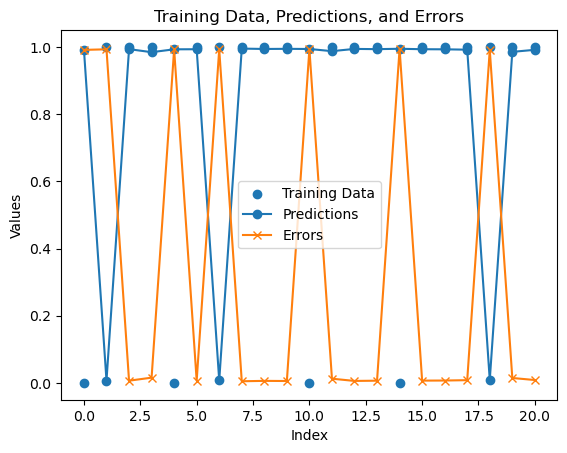

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have training data and predictions as NumPy arrays
# Replace these with your actual data
train_data = y_test_one_hot
predictions = loaded_model.predict(X_train)

# Select the column of train_data to compare with predictions
column_to_compare = 0  # Adjust this based on the column you want to compare
selected_train_data = train_data[:, column_to_compare]

# Ensure that the sizes are compatible
min_length = min(len(selected_train_data), len(predictions))
selected_train_data = selected_train_data[:min_length]
predictions = predictions[:min_length, column_to_compare]

# Calculate errors
errors = np.abs(selected_train_data - predictions)

# Plotting the training data
plt.scatter(range(len(selected_train_data)), selected_train_data, label='Training Data')

# Plotting the predictions
plt.plot(range(len(predictions)), predictions, label='Predictions', marker='o')

# Plotting the errors
plt.plot(range(len(errors)), errors, label='Errors', marker='x')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Training Data, Predictions, and Errors')

# Adding legend
plt.legend()

# Display the plot
plt.show()
